In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Take a look at get_shatten_statistics results

Current size is 50. Each simulation had 100 trials. IRLS start from identity matrix. Simulations parameters:

`
num_cut_finder_trials = 10; # to find the cut
is_quiet = true;
is_cvx_quiet = true;
p = 0.05; # in Schatten norms
eps = 0.1; # in Schatten norms
num_iter = 10; # IRLS iterations
precision = 0.001; # IRLS tolerance
methods = {'schatten'};
rank_tolerance = 1e-3;`

In [4]:
def read_and_prepare_data(filename):
    results = pd.read_csv(filename)
    results['cut_optval_delta'] = results['schatten_cut_optval'] - results['sdp_cut_optval']
    results['optval_delta'] = results['schatten_optval'] - results['sdp_optval']
    results['rank_delta'] = results['schatten_rank'] - results['sdp_rank']
    
    return results

In [5]:
results02 = read_and_prepare_data('./results/test02_diag.csv')
results05 = read_and_prepare_data('./results/test05_diag.csv')
results08 = read_and_prepare_data('./results/test08_diag.csv')

# Cut differences

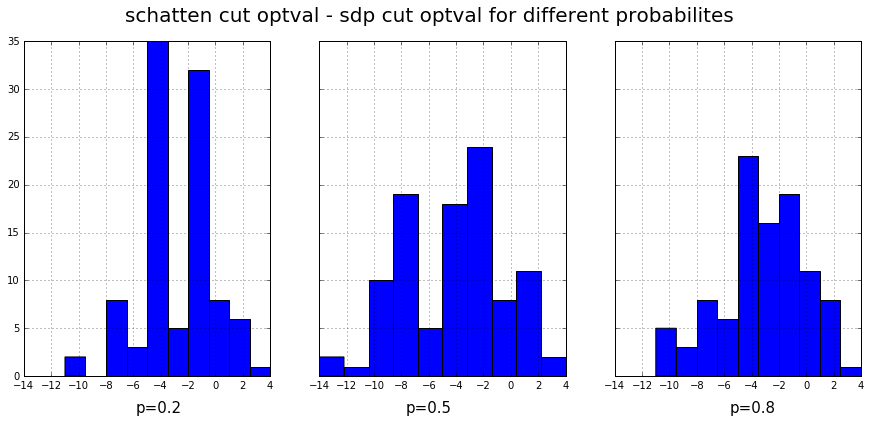

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
results02['cut_optval_delta'].hist(ax=axes[0])
results05['cut_optval_delta'].hist(ax=axes[1])
results08['cut_optval_delta'].hist(ax=axes[2])

fig.text(0.25, 0.04, 'p=0.2', ha='center', fontsize=15)
fig.text(0.5, 0.04, 'p=0.5', ha='center', fontsize=15)
fig.text(0.8, 0.04, 'p=0.8', ha='center', fontsize=15)
plt.suptitle("schatten cut optval - sdp cut optval for different probabilites", fontsize=20)
plt.show()

### p=0.2

In [7]:
print("Difference is equal or greater than 0:\t%.2f" % \
      (sum(results02['cut_optval_delta'] >= 0) / len(results02['cut_optval_delta'])))
print("Difference is greater than 0:\t\t%.2f" % \
      (sum(results02['cut_optval_delta'] > 0) / len(results02['cut_optval_delta'])))

Difference is equal or greater than 0:	0.15
Difference is greater than 0:		0.07


### p=0.5

In [8]:
print("Difference is equal or greater than 0:\t%.2f" % \
      (sum(results05['cut_optval_delta'] >= 0) / len(results05['cut_optval_delta'])))
print("Difference is greater than 0:\t\t%.2f" % \
      (sum(results05['cut_optval_delta'] > 0) / len(results05['cut_optval_delta'])))

Difference is equal or greater than 0:	0.16
Difference is greater than 0:		0.13


### p=0.8

In [9]:
print("Difference is equal or greater than 0:\t%.2f" % \
      (sum(results08['cut_optval_delta'] >= 0) / len(results08['cut_optval_delta'])))
print("Difference is greater than 0:\t\t%.2f" % \
      (sum(results08['cut_optval_delta'] > 0) / len(results08['cut_optval_delta'])))

Difference is equal or greater than 0:	0.20
Difference is greater than 0:		0.09


# Optval differences

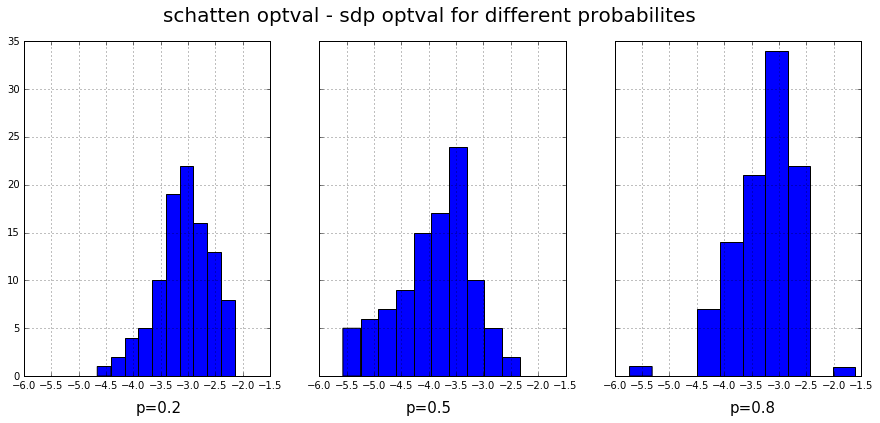

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
results02['optval_delta'].hist(ax=axes[0])
results05['optval_delta'].hist(ax=axes[1])
results08['optval_delta'].hist(ax=axes[2])

fig.text(0.25, 0.04, 'p=0.2', ha='center', fontsize=15)
fig.text(0.5, 0.04, 'p=0.5', ha='center', fontsize=15)
fig.text(0.8, 0.04, 'p=0.8', ha='center', fontsize=15)
plt.suptitle("schatten optval - sdp optval for different probabilites", fontsize=20)
plt.show()

As one can see, Schatten norm solution is always smaller than the SDP one

# Rank difference

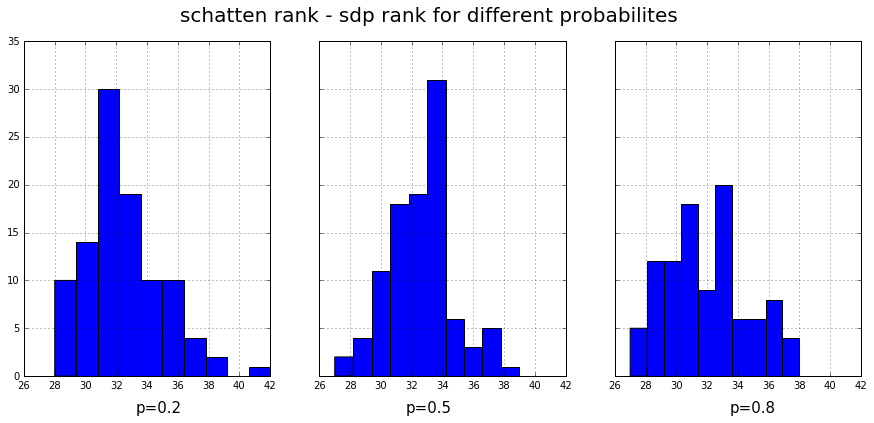

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15, 6))
results02['rank_delta'].hist(ax=axes[0])
results05['rank_delta'].hist(ax=axes[1])
results08['rank_delta'].hist(ax=axes[2])

fig.text(0.25, 0.04, 'p=0.2', ha='center', fontsize=15)
fig.text(0.5, 0.04, 'p=0.5', ha='center', fontsize=15)
fig.text(0.8, 0.04, 'p=0.8', ha='center', fontsize=15)
plt.suptitle("schatten rank - sdp rank for different probabilites", fontsize=20)
plt.show()

However, for rank tolerance `1e-3` (i.e. all singular values are considered zero if they are smaller than tolerance) rank difference is quite impressing.